# Environment settings

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/ColabNotebooks/AN2DL/Homework1/

Mounted at /gdrive
/gdrive/MyDrive/ColabNotebooks/AN2DL/Homework1


## Libraries

In [2]:
import os
import random

from shutil import copyfile
from shutil import move

import matplotlib.pyplot as plt

import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from shutil import move

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.9.2


## Random Seed

In [3]:
# Random seed for reproducibility
SEED = 42

random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)


# Data Pre-Processing
* Training set : 60%
* Validation set : 20%
* Testing set : 20%

**Stratified sampling procedure** : because the proportion among classes are very different and must be preserved in order to avoid biased predictions.

Parameters setting:

In [4]:
# Directories
dataset_dir = 'training_data_final' # The name of the original dataset, it has to be in the same directory of this notebook
sub_dir_s = ['training','validation','testing']

# Splitting proportions
train = .8 # 60%
val = .15 # 20%
test = .05 # 20%

# Labels name
labels = ['Species1', 'Species2', 'Species3', 'Species4', 'Species5', 'Species6', 'Species7', 'Species8']

Directories organization:

In [5]:
# Getting current working directory
path = os.getcwd()

# Operative directories (training, validation, testing)
for sub in sub_dir_s:
    # Full path
    name = path + '/' + sub

    # mkdir
    try:
        os.mkdir(name)
    except OSError:
        print ("Creation of the directory %s failed" % name)
    else:
        print ("Successfully created the directory %s " % name)   

    # For each label (leaf categories)
    for label in labels:
        # Class directory
        class_name = name + '/' + label

        # mkdir
        try:
            os.mkdir(class_name)
        except OSError:
            print ("Creation of the directory %s failed" % class_name)
        else:
            print ("Successfully created the directory %s " % class_name)

Successfully created the directory /gdrive/MyDrive/ColabNotebooks/AN2DL/Homework1/training 
Successfully created the directory /gdrive/MyDrive/ColabNotebooks/AN2DL/Homework1/training/Species1 
Successfully created the directory /gdrive/MyDrive/ColabNotebooks/AN2DL/Homework1/training/Species2 
Successfully created the directory /gdrive/MyDrive/ColabNotebooks/AN2DL/Homework1/training/Species3 
Successfully created the directory /gdrive/MyDrive/ColabNotebooks/AN2DL/Homework1/training/Species4 
Successfully created the directory /gdrive/MyDrive/ColabNotebooks/AN2DL/Homework1/training/Species5 
Successfully created the directory /gdrive/MyDrive/ColabNotebooks/AN2DL/Homework1/training/Species6 
Successfully created the directory /gdrive/MyDrive/ColabNotebooks/AN2DL/Homework1/training/Species7 
Successfully created the directory /gdrive/MyDrive/ColabNotebooks/AN2DL/Homework1/training/Species8 
Successfully created the directory /gdrive/MyDrive/ColabNotebooks/AN2DL/Homework1/validation 
Succes

Splitting procedure:

In [6]:
# Stratified sampling procedure
def stratified_sampling(labels, dataset_path, train_p, val_p):
    # params:
    # - labels : classes' label to be considered
    # - train_p : train samples proportion
    # - val_p : validation samples proportion
    # - test_p : test samples proportion

    # Return lists
    train_set = []
    val_set = []
    test_set = []

    # For each class
    for i in range(len(labels)):
        if i < len(labels):
            # Selecting all the images of the i-th class
            class_imgs = next(os.walk(os.getcwd() + '/{}/{}/'.format(dataset_path, labels[i])))[2]

            # Lenght
            class_len = len(class_imgs)

            # Shuffling
            random.shuffle(class_imgs)

            # Splitting
            train = class_imgs[:int(train_p*class_len)]
            val = class_imgs[int(train_p*class_len):int((train_p + val_p)*class_len)]
            test = class_imgs[int((train_p+val_p)*class_len):]

            # Append lists to the corresponding index
            train_set.append(train)
            val_set.append(val)
            test_set.append(test)
    
    return train_set, val_set, test_set

Directory populations setting:

In [7]:
# Stratified sampling
train_set, val_set, test_set = stratified_sampling(labels, dataset_dir, train_p=train, val_p=val)

# Getting current working directory
path = os.getcwd()
print(path)

# Operative directories (training, validation, testing)
for sub in sub_dir_s:
    # Taking the correct list
    if (sub == 'training'):
        list = train_set
    elif (sub == 'validation'):
        list = val_set
    else:
        list = test_set

    # For each class target
    for i in labels:
        # Source path taking the full dataset from the root
        src_path = dataset_dir + '/' + i + '/'

        # Destination path taking the target sub directory          
        dst_path = path + '/' + sub + '/' + i + '/'

        # Copying each image to the new directory
        for img in list[labels.index(i)]:
            copyfile(src_path + img, dst_path + img)

/gdrive/MyDrive/ColabNotebooks/AN2DL/Homework1


Checking numbers:

In [8]:
def count_samples_classes(labels, dir_path):
    # Counters list
    counters = []

    # For each class
    for i in range(len(labels)):
        # Selecting all the images of the i-th class
        class_samples = next(os.walk('{}/{}/'.format(dir_path, labels[i])))[2]

        # Storing the counter bound with the class target
        counters.append((labels[i], len(class_samples)))
    
    return counters

In [9]:
# Current path
path = os.getcwd() + '/'

# Original dataset
print('Original Dataset:')
print(count_samples_classes(labels, path + dataset_dir))

# Training set
print('\nTraining set:')
print(count_samples_classes(labels, path + 'training'))

# Validation set
print('\nValidation set:')
print(count_samples_classes(labels, path + 'validation'))

# Testing set
print('\nTesting set:')
print(count_samples_classes(labels, path + 'testing'))

Original Dataset:
[('Species1', 186), ('Species2', 532), ('Species3', 515), ('Species4', 511), ('Species5', 531), ('Species6', 222), ('Species7', 537), ('Species8', 508)]

Training set:
[('Species1', 148), ('Species2', 425), ('Species3', 412), ('Species4', 408), ('Species5', 424), ('Species6', 177), ('Species7', 429), ('Species8', 406)]

Validation set:
[('Species1', 28), ('Species2', 80), ('Species3', 77), ('Species4', 77), ('Species5', 80), ('Species6', 33), ('Species7', 81), ('Species8', 76)]

Testing set:
[('Species1', 10), ('Species2', 27), ('Species3', 26), ('Species4', 26), ('Species5', 27), ('Species6', 12), ('Species7', 27), ('Species8', 26)]


Creating the splitted dataset folder

In [10]:
target = 'dataset_splitted' # Created in the same directory of this notebook
if(not os.path.isdir(target)):
	os.mkdir(target)

move('training', target + '/training')
move('validation', target + '/validation')
move('testing', target + '/testing')

'dataset_splitted/testing'

In [11]:
"""Count the number of images in the dataset_splitted directory"""
path = os.getcwd() + '/dataset_splitted'
print('Training set:')
print(count_samples_classes(labels, path + '/training'))
print('\nValidation set:')
print(count_samples_classes(labels, path + '/validation'))
print('\nTesting set:')
print(count_samples_classes(labels, path + '/testing'))

Training set:
[('Species1', 148), ('Species2', 425), ('Species3', 412), ('Species4', 408), ('Species5', 424), ('Species6', 177), ('Species7', 429), ('Species8', 406)]

Validation set:
[('Species1', 28), ('Species2', 80), ('Species3', 77), ('Species4', 77), ('Species5', 80), ('Species6', 33), ('Species7', 81), ('Species8', 76)]

Testing set:
[('Species1', 10), ('Species2', 27), ('Species3', 26), ('Species4', 26), ('Species5', 27), ('Species6', 12), ('Species7', 27), ('Species8', 26)]


In [12]:
"""Count the number of images in the dataset_splitted directory"""
path = os.getcwd() + '/dataset_splitted'
print('Training set:')
print(count_samples_classes(labels, path + '/training'))
print('\nValidation set:')
print(count_samples_classes(labels, path + '/validation'))
print('\nTesting set:')
print(count_samples_classes(labels, path + '/testing'))

Training set:
[('Species1', 148), ('Species2', 425), ('Species3', 412), ('Species4', 408), ('Species5', 424), ('Species6', 177), ('Species7', 429), ('Species8', 406)]

Validation set:
[('Species1', 28), ('Species2', 80), ('Species3', 77), ('Species4', 77), ('Species5', 80), ('Species6', 33), ('Species7', 81), ('Species8', 76)]

Testing set:
[('Species1', 10), ('Species2', 27), ('Species3', 26), ('Species4', 26), ('Species5', 27), ('Species6', 12), ('Species7', 27), ('Species8', 26)]


#  Examples

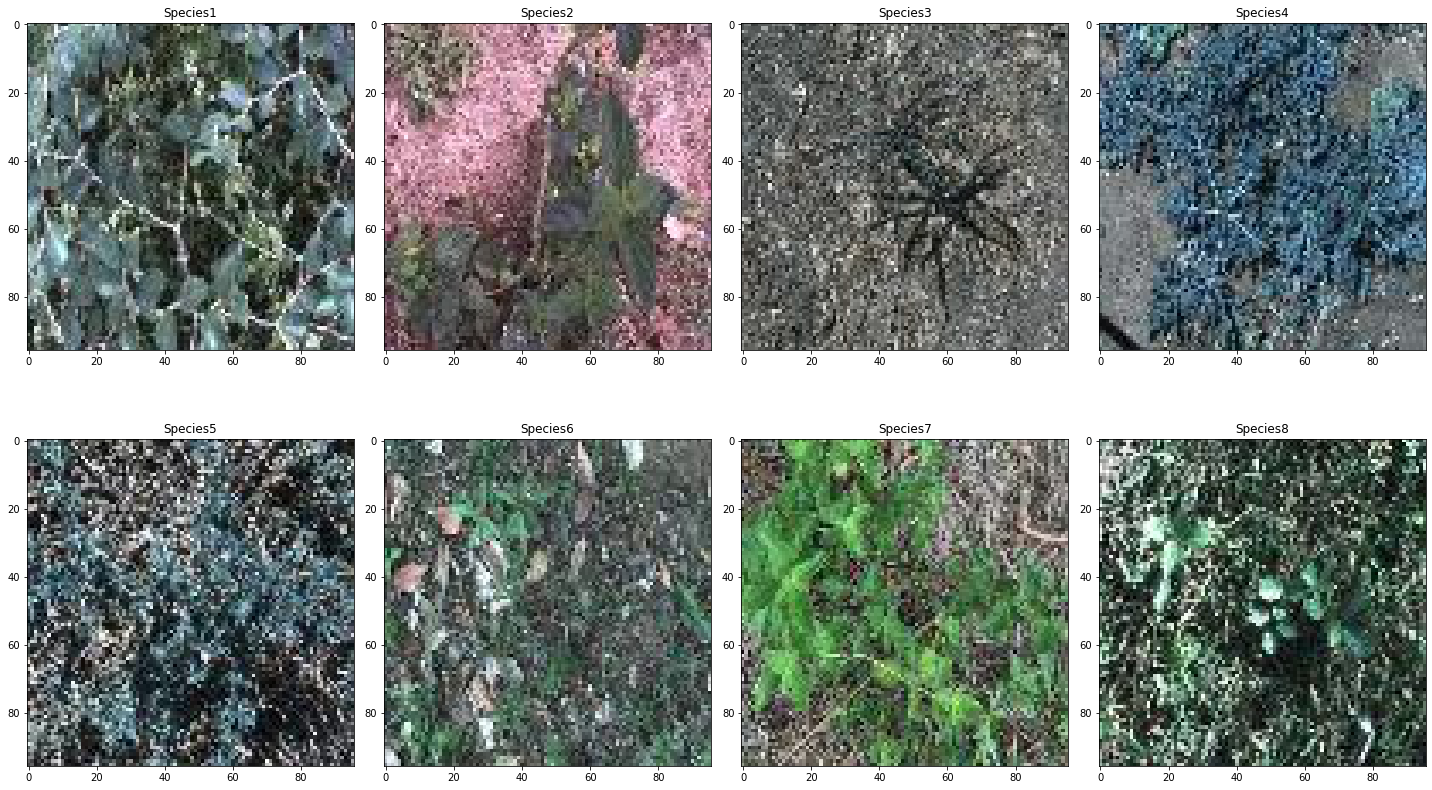

In [13]:
dataset_dir = 'dataset_splitted'

num_row = 2
num_col = 4
fig, axes = plt.subplots(num_row, num_col, figsize=(10*num_row,3*num_col))
for i in range(num_row*num_col):
  if i < 21:
    class_imgs = next(os.walk('{}/training/{}/'.format(dataset_dir, labels[i])))[2]
    class_img = class_imgs[0]
    img = Image.open('{}/training/{}/{}'.format(dataset_dir, labels[i], class_img))
    ax = axes[i//num_col, i%num_col]
    ax.imshow(np.array(img))
    ax.set_title('{}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [14]:
"""Count the number of images in the dataset_splitted directory for training"""
def count_samples_classes(labels, path):
  count = []
  for i in range(len(labels)):
    count.append(len(next(os.walk(path + '/' + labels[i]))[2]))
  return count

count_samples_classes(labels, 'dataset_splitted/training')

[148, 425, 412, 408, 424, 177, 429, 406]

In [15]:
# Calculate the amount of oversampling needed for each class
def oversampling_needed(labels, path):
  count = count_samples_classes(labels, path)
  max_count = max(count)
  oversampling = []
  for i in range(len(labels)):
    oversampling.append(max_count - count[i])
  return oversampling
oversampling_needed(labels, 'dataset_splitted/training')

[281, 4, 17, 21, 5, 252, 0, 23]

In [16]:
# Randomly oversample the training set according to the oversampling_needed
def oversample(labels, path, oversampling_needed):
  for i in range(len(labels)):
    print(i)
    print('Oversampling class {}...'.format(labels[i]))
    if oversampling_needed[i] > 0:
      print('Oversampling needed: {}'.format(oversampling_needed[i]))
      class_imgs = next(os.walk(path + '/' + labels[i]))[2]
      print('Number of images in class {}: {}'.format(labels[i], len(class_imgs)))
      for j in range(oversampling_needed[i]):
        print('Oversampling image {}...'.format(j))
        img = Image.open(path + '/' + labels[i] + '/' + class_imgs[j])
        img.save(path + '/' + labels[i] + '/' + class_imgs[j][:-4] + '_copy' + class_imgs[j][-4:])
oversample(labels, 'dataset_splitted/training', oversampling_needed(labels, 'dataset_splitted/training'))

0
Oversampling class Species1...
Oversampling needed: 281
Number of images in class Species1: 148
Oversampling image 0...
Oversampling image 1...
Oversampling image 2...
Oversampling image 3...
Oversampling image 4...
Oversampling image 5...
Oversampling image 6...
Oversampling image 7...
Oversampling image 8...
Oversampling image 9...
Oversampling image 10...
Oversampling image 11...
Oversampling image 12...
Oversampling image 13...
Oversampling image 14...
Oversampling image 15...
Oversampling image 16...
Oversampling image 17...
Oversampling image 18...
Oversampling image 19...
Oversampling image 20...
Oversampling image 21...
Oversampling image 22...
Oversampling image 23...
Oversampling image 24...
Oversampling image 25...
Oversampling image 26...
Oversampling image 27...
Oversampling image 28...
Oversampling image 29...
Oversampling image 30...
Oversampling image 31...
Oversampling image 32...
Oversampling image 33...
Oversampling image 34...
Oversampling image 35...
Oversampling

IndexError: ignored

In [17]:
"""Count the number of images in the dataset_splitted directory"""
path = os.getcwd() + '/dataset_splitted'
print('Training set:')
print(count_samples_classes(labels, path + '/training'))
print('\nValidation set:')
print(count_samples_classes(labels, path + '/validation'))
print('\nTesting set:')
print(count_samples_classes(labels, path + '/testing'))

Training set:
[296, 425, 412, 408, 424, 177, 429, 406]

Validation set:
[28, 80, 77, 77, 80, 33, 81, 76]

Testing set:
[10, 27, 26, 26, 27, 12, 27, 26]
